## Emergency Calls Data Capstone Project 

## Overview
In this capstone project, we analyze 911 emergency call data from [Kaggle] to uncover trends in emergency types, response patterns, and time-based insights.

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
** Import numpy and pandas **

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

** Checking the info() of the df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Checking the head of df **

In [6]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


Top 5 zipcodes for 911 calls

In [7]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 townships (twp) for 911 calls

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [11]:
df['title'].nunique()

110

## Feature Engineering: Extracting Reasons for 911 Calls

The title column contains information about the type of emergency call. The format of the title is:
For example:

"EMS: BACK PAINS/INJURY" → EMS
"Fire: GAS-LEAK/INSIDE" → Fire
"Traffic: VEHICLE ACCIDENT" → Traffic

To extract the main reason for the call, I created a new column called Reason using the .apply() method with a lambda function 

For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. 

In [13]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

Most Common Reasons for 911 Calls

After extracting the Reason, I analyzed the most frequent categories: 

In [14]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [ ]:
EMS-related emergencies are the most common, followed by Traffic incidents and Fire emergencies.

To better understand the distribution, I created a countplot using Seaborn:

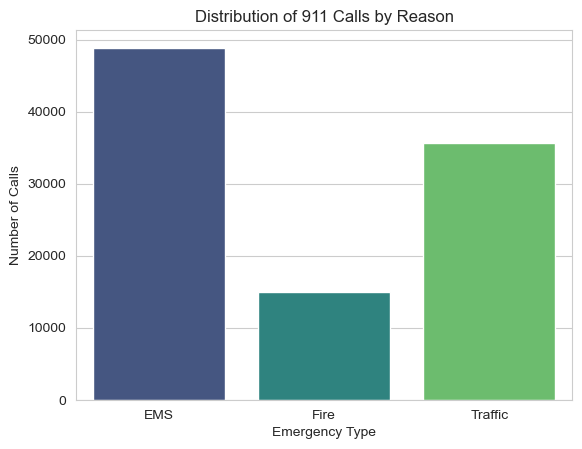

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Reason', data=df, palette='viridis')
plt.title("Distribution of 911 Calls by Reason")
plt.xlabel("Emergency Type")
plt.ylabel("Number of Calls")
plt.show()


In [ ]:
This visualization clearly shows that EMS calls are the most frequent, followed by Traffic and Fire-related emergencies.

## Analyzing Time Information in 911 Calls

The timeStamp column initially contained string-based timestamps, which made it difficult to analyze time-based trends. First, I checked the data type of the timeStamp column:

In [16]:
type(df['timeStamp'].iloc[0])

str

To facilitate time-based analysis, I converted the timeStamp column into a DateTime object using Pandas:

In [17]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Now, we can easily extract specific time-based attributes such as Hour, Month, and Day of the Week.

In [18]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

The Day of Week column was initially represented as integers (0-6), so I mapped them to their corresponding names:

In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [20]:
df['Day of Week'] = df['Day of Week'].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

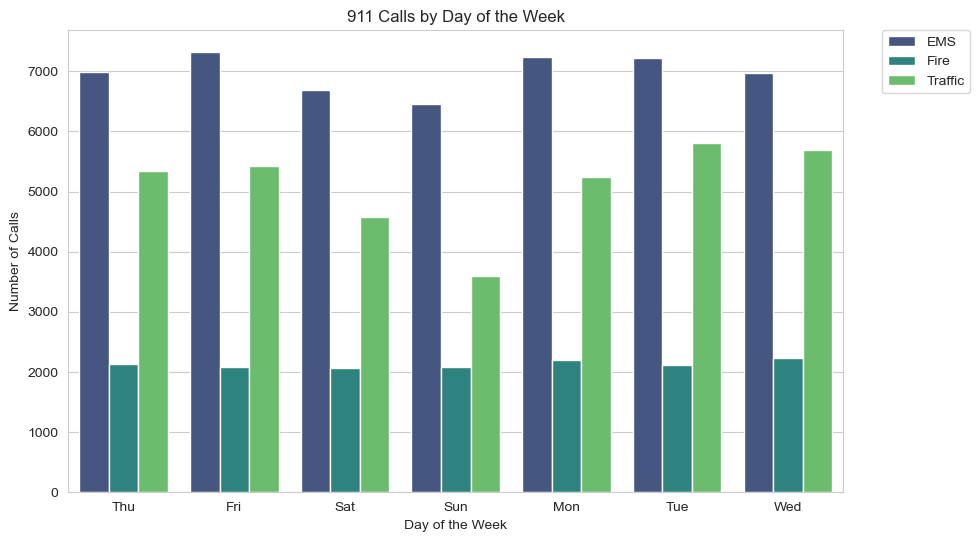

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')

# Adjusting the legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("911 Calls by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Calls")
plt.show()

Similarly, I visualized the distribution of calls across different months:

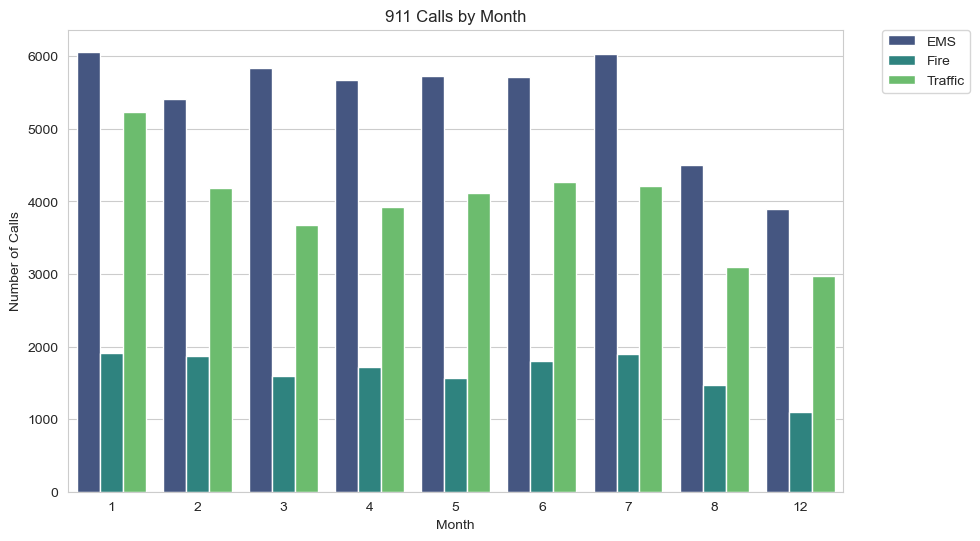

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')

# Adjusting the legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("911 Calls by Month")
plt.xlabel("Month")
plt.ylabel("Number of Calls")
plt.show()


While analyzing the distribution of 911 calls by month, I noticed that some months (9, 10, and 11) were missing from the countplot visualization. To address this, I decided to group the dataset by month and analyze the total number of calls in each month.

In [42]:
# It is missing some months! 9,10, and 11 are not there.

To address this, I decided to group the dataset by month and analyze the total number of calls in each month.

To get the total number of calls per month, I used the groupby() method:

In [23]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Using a line plot, I visualized the number of calls per month to ensure all months are accounted for:

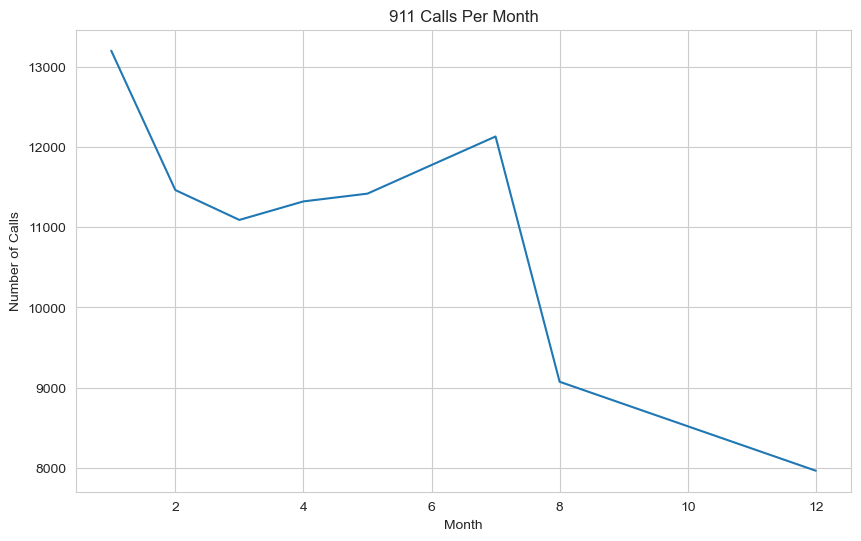

In [24]:
# Could be any column
plt.figure(figsize=(10, 6))
byMonth['twp'].plot()
plt.title("911 Calls Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Calls")
plt.show()


To analyze the trend in the number of calls over the months, I used Seaborn’s lmplot() to fit a linear regression model:

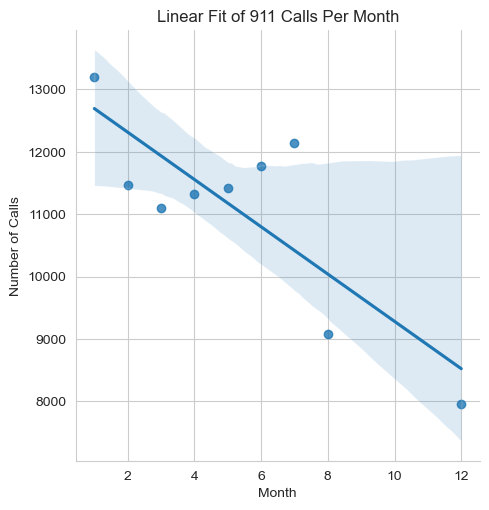

In [25]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

plt.title("Linear Fit of 911 Calls Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Calls")
plt.show()


To analyze the daily call trends, I extracted the date from the timestamp column using the .date() method.

In [27]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

1. Total Number of 911 Calls Per Day

To see how call volumes fluctuate over time, I plotted the total number of calls per day:

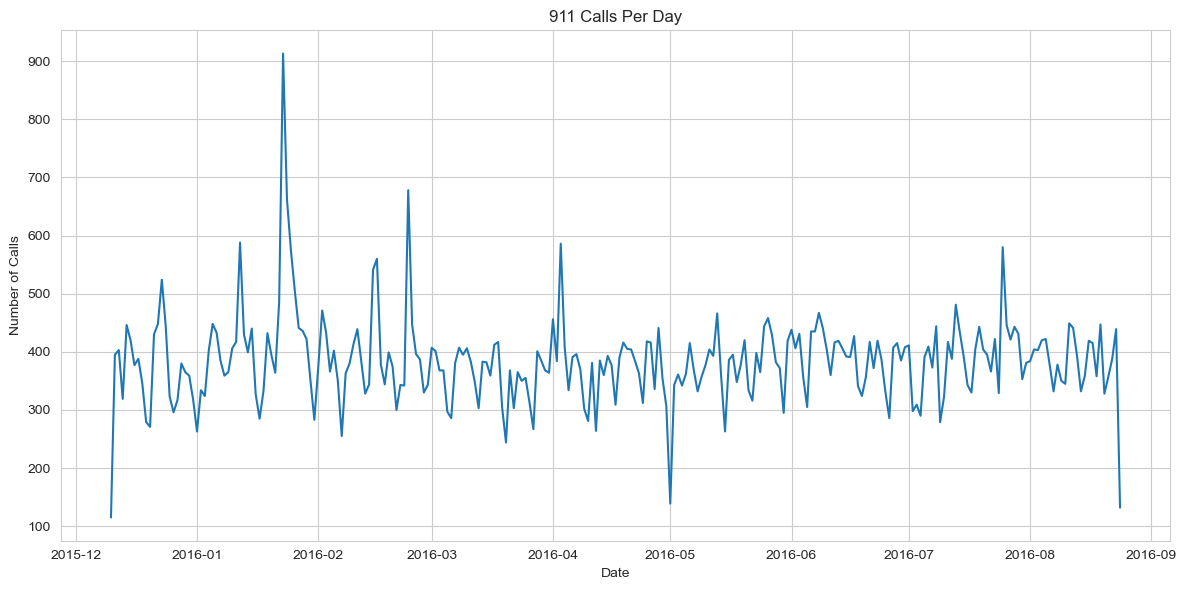

In [28]:
plt.figure(figsize=(12, 6))
df.groupby('Date').count()['twp'].plot()
plt.xlabel("Date")
plt.ylabel("Number of Calls")
plt.title("911 Calls Per Day")
plt.tight_layout()
plt.show()


To further investigate, I created three separate plots showing the number of calls per day for Traffic, Fire, and EMS reasons.

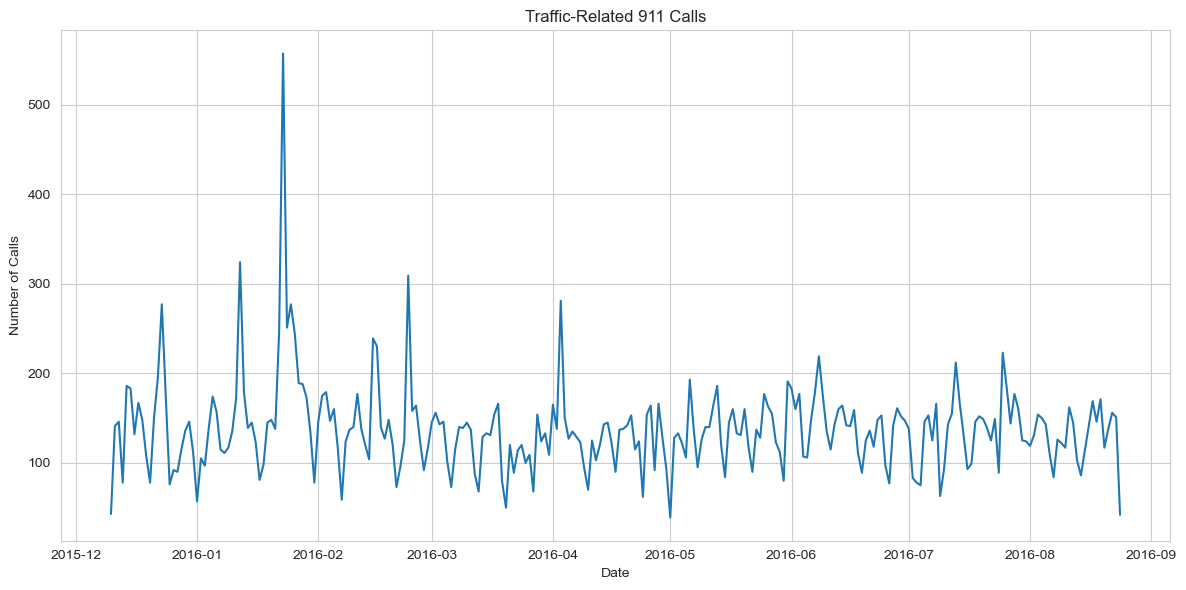

In [30]:
plt.figure(figsize=(12, 6))

df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic-Related 911 Calls')
plt.xlabel("Date")
plt.ylabel("Number of Calls")
plt.tight_layout()
plt.show()



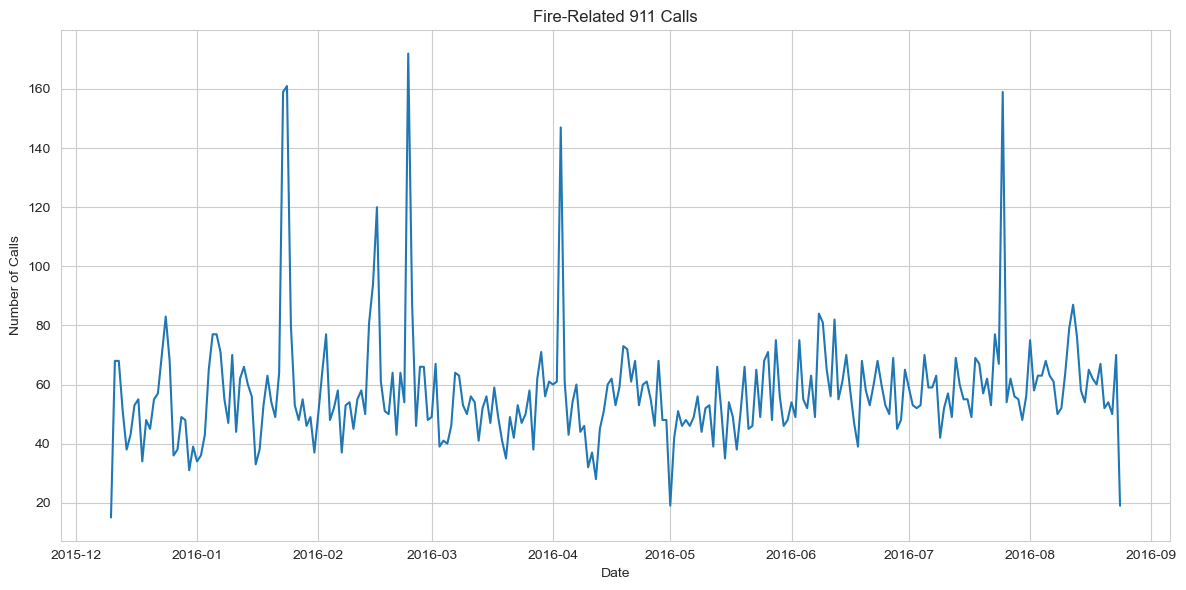

In [31]:
plt.figure(figsize=(12, 6))
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire-Related 911 Calls')
plt.xlabel("Date")
plt.ylabel("Number of Calls")
plt.tight_layout()
plt.show()

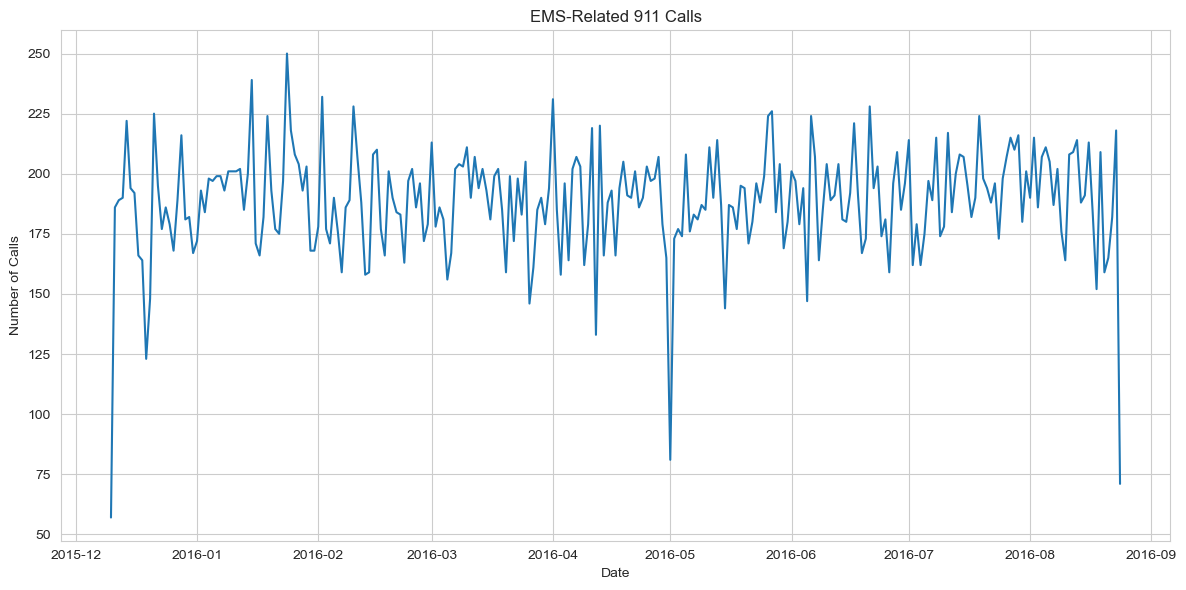

In [32]:
plt.figure(figsize=(12, 6))
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS-Related 911 Calls')
plt.xlabel("Date")
plt.ylabel("Number of Calls")
plt.tight_layout()
plt.show()

Next, I wanted to analyze the patterns of 911 calls across different days of the week and hours of the day.

To analyze how 911 calls vary by hour across different days of the week, I created a heatmap.

I first grouped the DataFrame by Day of the Week and Hour, then used .unstack() to reshape the data.

In [35]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Creating the Heatmap

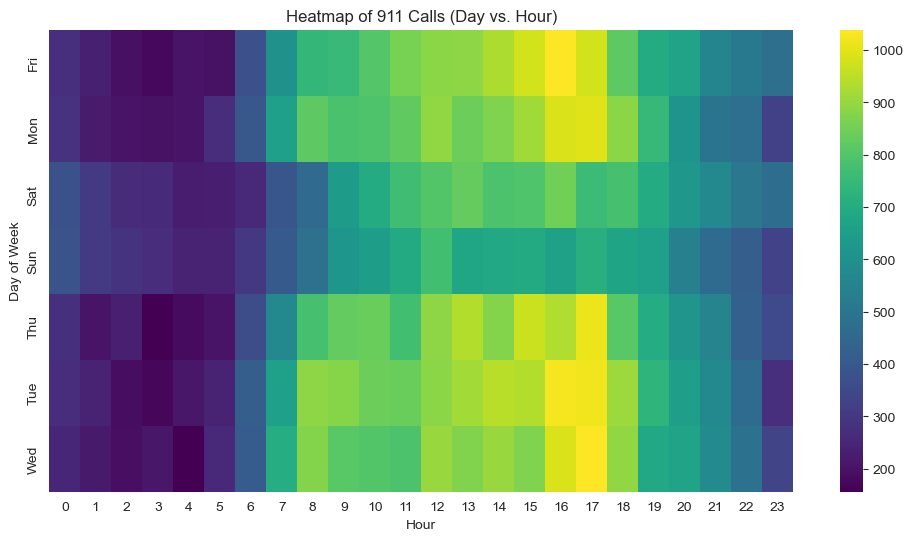

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')
plt.title("Heatmap of 911 Calls (Day vs. Hour)")
plt.show()


To further explore the relationships between the data points, I used a clustermap, which groups similar patterns together.

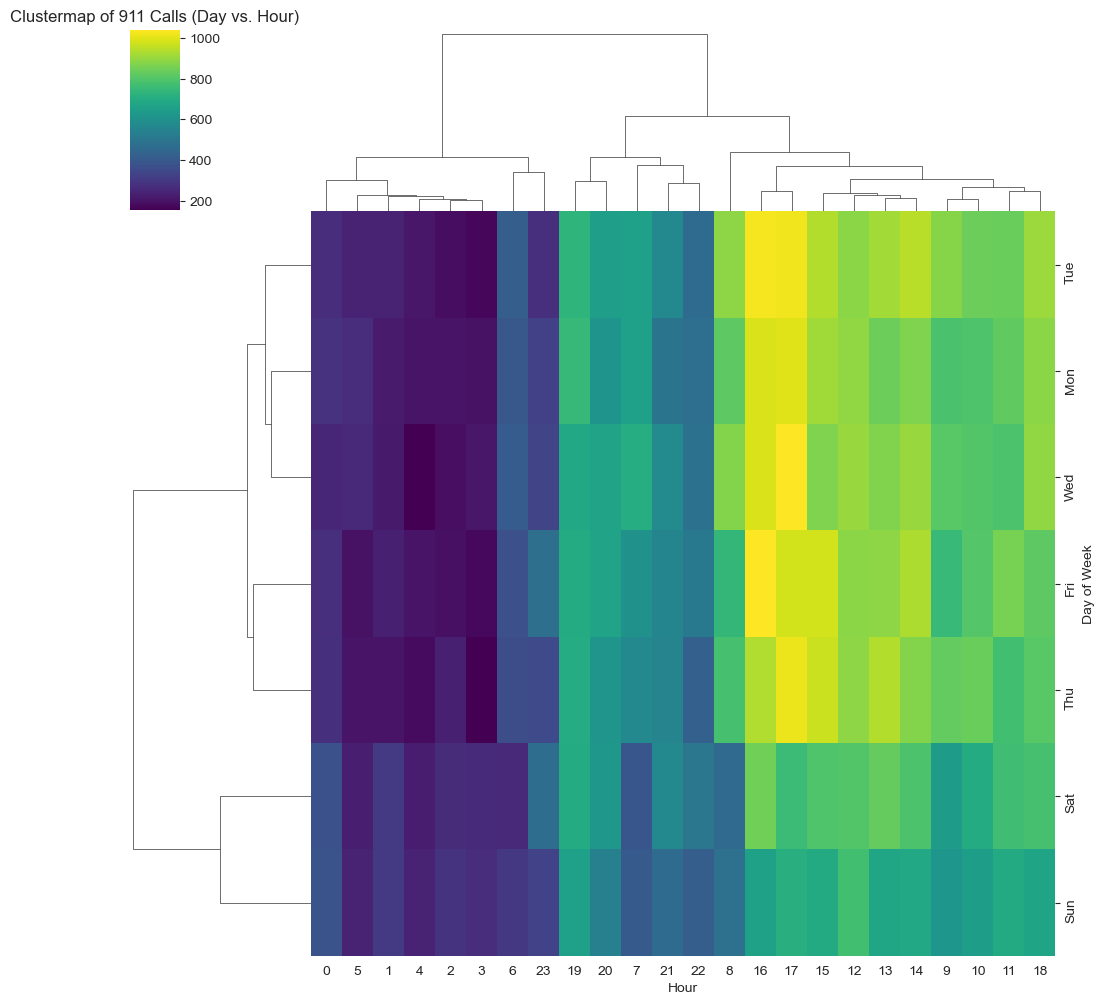

In [37]:
sns.clustermap(dayHour, cmap='viridis')
plt.title("Clustermap of 911 Calls (Day vs. Hour)")
plt.show()


I also examined how 911 calls fluctuate across different months of the year.

In [38]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


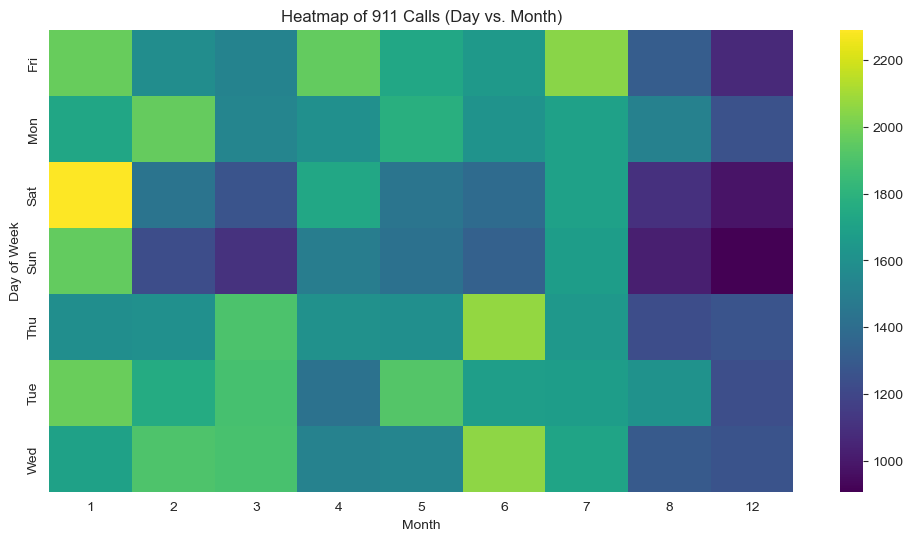

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')
plt.title("Heatmap of 911 Calls (Day vs. Month)")
plt.show()


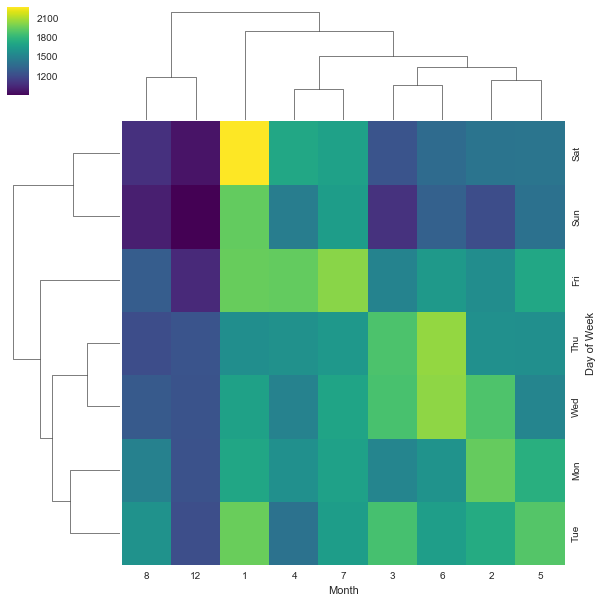

In [56]:
sns.clustermap(dayMonth,cmap='viridis')

Conclusion

This project provided valuable insights into 911 emergency call trends, including the most common reasons for calls, peak hours, and seasonal variations. By using heatmaps and clustermaps, we identified patterns that could help emergency services optimize their response strategies.